In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# **Casos diarios**: Data product 5.

In [2]:
path5 = 'D:\Proyectos\Datos-COVID19\output\producto5\TotalesNacionales.csv'
#df = pd.read_csv('TotalesNacionales.csv').transpose()
df = pd.read_csv(path5).transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]
df.tail(10)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2021-06-24,2760,1.53187e+06,NaN,31797,30735,515,3448,78394,30735,1.46934e+06,1.42168e+06,1.46814e+06,30735,302750,10069,173,53472,1463,752
2021-06-25,3933,1.53747e+06,NaN,32012,31897,1338,5628,76052,31897,1.47356e+06,1.42941e+06,1.47234e+06,31897,304333,10255,357,54038,1469,596
2021-06-26,3540,1.54264e+06,NaN,32163,30389,1334,5208,73650,30389,1.48009e+06,1.43683e+06,1.47884e+06,30389,305641,9832,334,54563,1485,566
2021-06-27,3032,1.5471e+06,NaN,32298,29118,1228,4488,70630,29118,1.48569e+06,1.44418e+06,1.48441e+06,29118,306818,9608,228,54986,1491,450
2021-06-28,2596,1.55114e+06,NaN,32454,27847,1192,4075,68474,27847,1.49084e+06,1.45021e+06,1.48954e+06,27847,307170,8625,287,55281,1500,338
2021-06-29,1827,1.55377e+06,NaN,32489,25688,579,2648,66535,25688,1.4956e+06,1.45475e+06,1.49428e+06,25688,307484,7743,242,55589,1507,320
2021-06-30,1676,1.5559e+06,NaN,32545,23242,354,2148,64341,23242,1.50012e+06,1.45902e+06,1.49879e+06,23242,307959,7072,118,55924,1510,355
2021-07-01,2033,1.55856e+06,NaN,32588,22224,493,2677,60326,22224,1.50374e+06,1.46564e+06,1.50241e+06,22224,309735,7656,151,56441,1516,540
2021-07-02,2825,1.56261e+06,NaN,32809,22739,1017,4086,57612,22739,1.50706e+06,1.47219e+06,1.50571e+06,22739,311036,7810,244,56819,1520,405
2021-07-03,2659,1.56646e+06,NaN,32973,22809,1030,3880,55186,22809,1.51068e+06,1.4783e+06,1.5093e+06,22809,312097,7669,191,57227,1532,443


In [3]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)

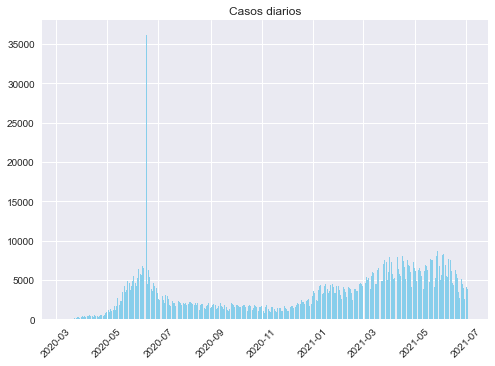

In [4]:
plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

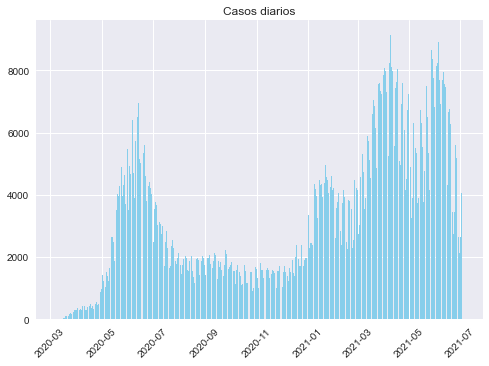

In [5]:
# El '2020-06-17' hay un número muy grande de casos. Parece que ese día agregaron datos que las 
# autoridades no estaban informando. Se decide por eliminar ese día para que la curva quede parecida
# a la curva "oficial".
df = df.drop(index=[datetime.datetime(2020, 6, 17)])

plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

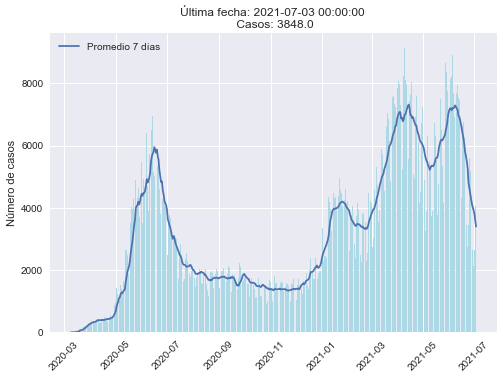

In [6]:
# Se agrega columna promedio 7 días para casos diarios.
n = 7
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
plt.xticks(rotation=45)
plt.title('Última fecha: {} \n Casos: {}'. format(df.index[-1], df['Casos diarios'][-1]))
plt.ylabel('Número de casos')
plt.legend()
plt.show()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

In [7]:
path9 = 'D:\Proyectos\Datos-COVID19\output\producto9\HospitalizadosUCIEtario_T.csv'
edad = pd.read_csv(path9)
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
edad.tail(10)

,<=39,40-49,50-59,60-69,>=70
2021-06-24,623,540,731,734,483
2021-06-25,609,522,686,725,486
2021-06-26,610,521,684,715,485
2021-06-27,606,512,679,724,493
2021-06-28,593,508,677,724,491
2021-06-29,575,492,671,726,492
2021-06-30,576,489,656,725,500
2021-07-01,568,490,630,719,513
2021-07-02,561,471,623,712,497
2021-07-03,542,449,621,720,499


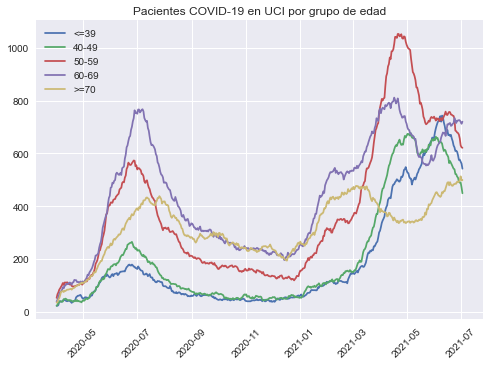

In [8]:
for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

In [9]:
path10 = 'D:\Proyectos\Datos-COVID19\output\producto10\FallecidosEtario_T.csv'
fallecidos_etario = pd.read_csv(path10)
fallecidos_etario.tail(10)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
441,2021-06-24,850,1330,3512,6559,8652,7913,2981
442,2021-06-25,858,1341,3532,6599,8714,7955,3013
443,2021-06-26,861,1348,3549,6627,8759,7983,3036
444,2021-06-27,868,1359,3569,6647,8797,8010,3048
445,2021-06-28,874,1365,3585,6686,8836,8047,3061
446,2021-06-29,875,1368,3587,6693,8847,8055,3064
447,2021-06-30,876,1372,3595,6701,8866,8070,3065
448,2021-07-01,877,1375,3597,6715,8879,8075,3070
449,2021-07-02,888,1382,3622,6761,8937,8122,3097
450,2021-07-03,896,1386,3643,6786,8978,8170,3114


In [10]:
# Poner fechas como index.
fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

# "Derivar" para encontrar los casos diarios desde los acumulados.
fallecidos_etario = fallecidos_etario.diff(periods=1)

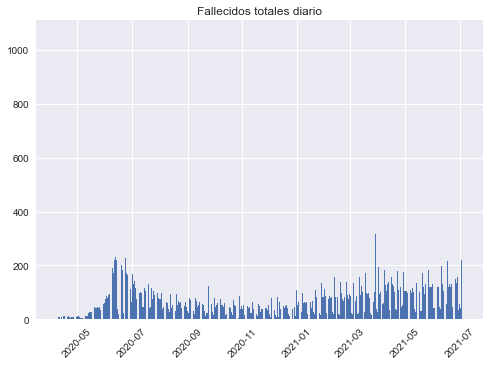

In [11]:
# Número total de fallecidos por día.
plt.bar(fallecidos_etario.sum(axis=1).index, fallecidos_etario.sum(axis=1).values)
plt.title('Fallecidos totales diario')
plt.xticks(rotation=45)
plt.show()

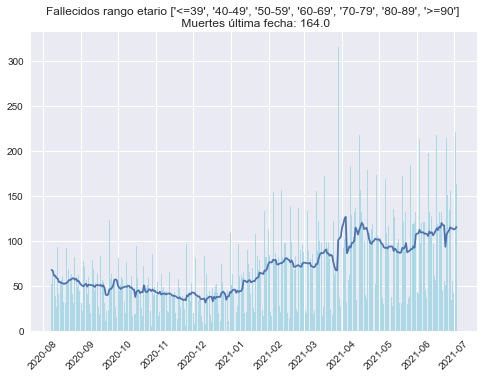

In [13]:
rangos =  ['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90']
start_date = datetime.datetime(2020, 8, 1)
#rangos = ['70-79', '80-89']

since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], color='lightblue')
plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:])
plt.xticks(rotation=45)
plt.title('Fallecidos rango etario {} \n Muertes última fecha: {}'.format(rangos, since_start_date.sum(axis=1)[-1]))
plt.show()